# Segmenting Based on Average Color in a Region of Interest (ROI)

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import rgb2lab

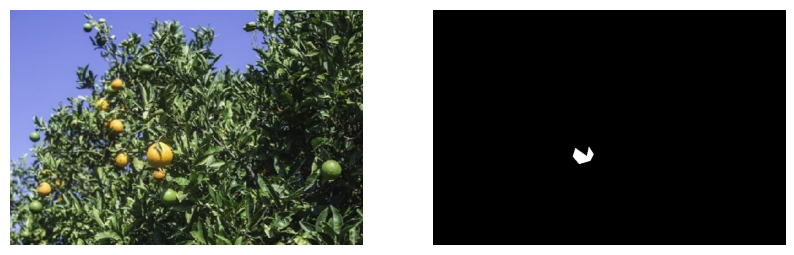

In [2]:
oranges = cv2.imread("./images/orangeTree.jpg")
oranges  = cv2.cvtColor(oranges, cv2.COLOR_BGR2RGB)
oranges_Lab = rgb2lab(oranges)
a = oranges_Lab[:, :, 1]
b = oranges_Lab[:, :, 2]
oranges_mask = np.loadtxt("./images/orangeMask.csv", delimiter=",", dtype=np.uint8).astype(bool)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(oranges)
axs[0].axis('off')
axs[1].imshow(oranges_mask, cmap='gray')
axs[1].axis('off')
plt.show()

To find the average color in the region of interest (ROI), we must first extract the pixel intensities in that region. We can use a mask to do this.

In [3]:
a_ROI = a[oranges_mask]
b_ROI = b[oranges_mask]

mean_ROI = np.array([a_ROI.mean(), b_ROI.mean()])

We can calculate distance between all of the pixels in the a* and b* planes using the distance formula.

$$
\sqrt{(a^* - a_{mean})^2 + (b^* - b_{mean})^2}
$$

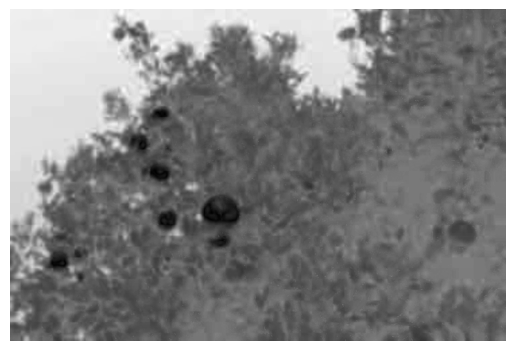

In [4]:
dist_oranges_Lab = np.sqrt((a - mean_ROI[0])**2 + (b - mean_ROI[1])**2)

plt.imshow(dist_oranges_Lab, cmap='gray')
plt.axis('off')
plt.show()

Dark regions of dist_oranges_Lab represent colors that are close, or similar, to the color of the region of interest and bright regions are dissimilar colors.

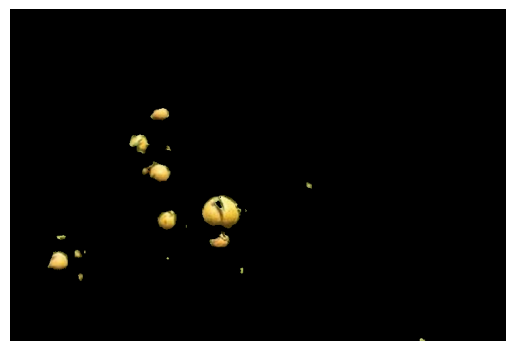

In [5]:
oranges_mask = dist_oranges_Lab < 25
oranges_masked = np.zeros_like(oranges)
for i in range(3):
    oranges_masked[:, :, i][oranges_mask == 1] = oranges[:, :, i][oranges_mask == 1]

plt.imshow(oranges_masked)
plt.axis('off')
plt.show()